# check inference results

In [40]:
mask_dict= {0: 'WEAR', 1:'INCORRECT', 2:'NORMAL'}
gender_dict = {0: 'MALE', 1:'FEMALE'}
age_dict = {0:'YOUNG', 1:'MID', 2:'OLD'}
label_dict = {}
name_dict = {}

for mask in mask_dict.keys():
    for gender in gender_dict.keys():
        for age in age_dict.keys():
            multi_class_name = f'{mask_dict[mask]}_{gender_dict[gender]}_{age_dict[age]}'
            multi_class_label = mask * 6 + gender * 3 + age
            label_dict[multi_class_name] = multi_class_label
            name_dict[multi_class_label] = multi_class_name

## one inference

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import numpy as np

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()

submission = pd.read_csv('betty3mike3_nosoftmax.csv')
### 보고 싶은 클래스 선택
submission = submission.loc[(submission['ans']==8) | (submission['ans']==11) | (submission['ans']==14) | (submission['ans']==17)].reset_index(drop=True)

for i in range(16):
    idx = np.arange(16)[i]
    image = cv2.imread('/opt/ml/input/data/eval/images/'+best['ImageID'][idx])[:,:,::-1]
    name = name_dict[submission['ans'][idx]]
    ax[i].imshow(image)
    ax[i].set_title(name)
# fig.delaxes(ax[7])
plt.show()

## three inferences

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
import os
import pandas as pd
import numpy as np

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flatten()

# 비교할 inference 두 개 선택
df1 = pd.read_csv('7655.csv')
df2 = pd.read_csv('betty3mike3_nosoftmax.csv')
check = (df1['ans']!=df2['ans'])

# best inference 선택
best = pd.read_csv('7655.csv').loc[check].reset_index(drop=True)
best['df1'] = df1.loc[check, 'ans'].reset_index(drop=True)
best['df2'] = df2.loc[check, 'ans'].reset_index(drop=True)

for i in range(16):
    # 보고 싶은 인덱스 선택
    idx = np.arange(16)[i]
    image = cv2.imread('/opt/ml/input/data/eval/images/'+best['ImageID'][idx])[:,:,::-1]
    name = name_dict[best['ans'][idx]] + '\n' + name_dict[best['df1'][idx]] + '\n' + name_dict[best['df2'][idx]]
    ax[i].imshow(image)
    ax[i].set_title(name)
plt.show()

# check the distribution

## one inference

/tmp/ipykernel_6762/2146738733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(submission['ans'])


<AxesSubplot:xlabel='ans', ylabel='Density'>

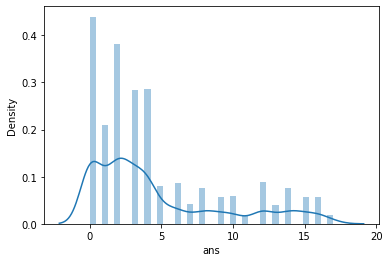

In [68]:
import seaborn as sns
submission = pd.read_csv(os.path.join(test_dir, 'betty3mike3_nosoftmax.csv'))
sns.distplot(submission['ans'])

## two inferences

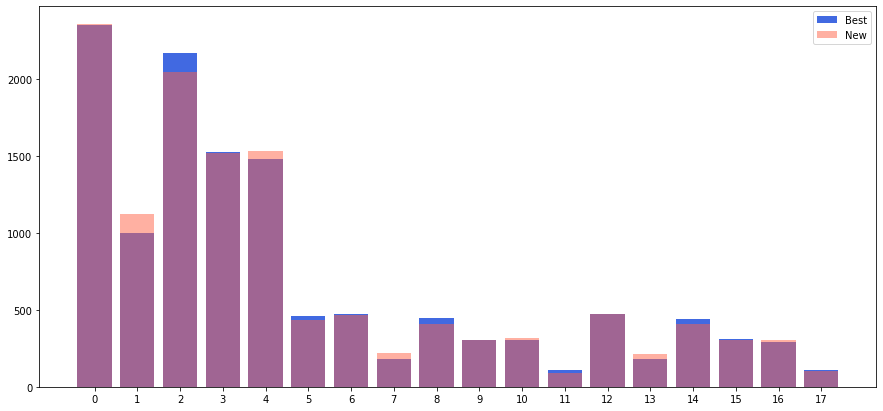

In [65]:
path_best = os.path.join(test_dir, 'betty3mike3.csv') #best-submission 경로
path_new = os.path.join(test_dir, 'betty3mike3_nosoftmax.csv') #비교할 submission 경로

df_new = pd.read_csv(path_new)
df_best = pd.read_csv(path_best)

x_new = df_new['ans'].value_counts().sort_index().index
y_new = df_new['ans'].value_counts().sort_index()

x_best = df_best['ans'].value_counts().sort_index().index
y_best = df_best['ans'].value_counts().sort_index()

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
axes.bar(x_best, y_best, color='royalblue', label= 'Best')
axes.bar(x_new, y_new, color='tomato', alpha = 0.5, label='New')
axes.set_xticks(x_new)
axes.legend()
plt.show()

## three distributions

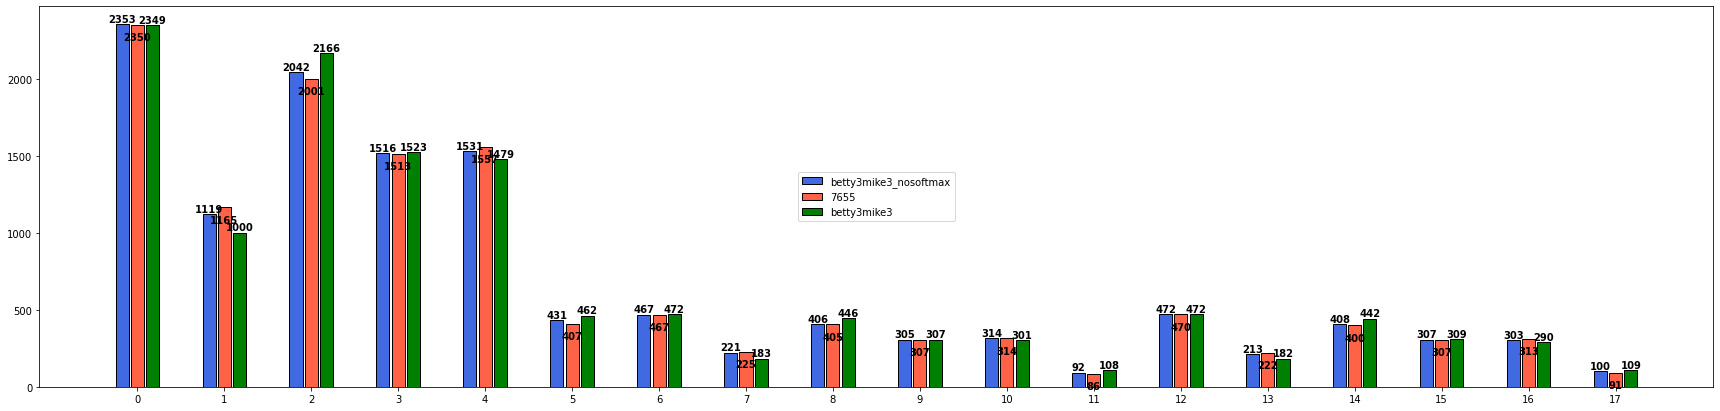

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 1. Load CSV
path_1 = '7655' 
path_2 = 'betty3mike3' 
path_3 = 'betty3mike3_nosoftmax'

test_dir = '/opt/ml/input/data/eval'
df_new1 = pd.read_csv(os.path.join(test_dir, f'{path_1}.csv'))   
df_new2 = pd.read_csv(os.path.join(test_dir, f'{path_2}.csv')) 
df_best = pd.read_csv(os.path.join(test_dir, f'{path_3}.csv'))

# 2. Create x and y labels
x_new1 = df_new1['ans'].value_counts().sort_index().index
y_new1 = df_new1['ans'].value_counts().sort_index()

x_new2 = df_new2['ans'].value_counts().sort_index().index
y_new2 = df_new2['ans'].value_counts().sort_index()

x_best = df_best['ans'].value_counts().sort_index().index
y_best = df_best['ans'].value_counts().sort_index()


# 3. Plot
fig, axes = plt.subplots(1, 1, figsize=(30, 7))
idx = np.arange(18)
axes.bar(idx-0.35/2, y_best, color='royalblue', label= f'{path_3}', width=0.15, edgecolor='black') # BEST
axes.bar(idx, y_new1, color='tomato', alpha = 1, label=f'{path_1}', width=0.15, edgecolor='black') # PATH_1
axes.bar(idx+0.35/2, y_new2, color='green', alpha = 1, label=f'{path_2}', width=0.15, edgecolor='black') # PATH_2
axes.set_xticks(idx)

# 4. Plot
# BEST
for idx, value in zip(idx-0.35/2, y_best):
    axes.text(x=idx, y=value+15, s=value, ha='center', fontweight='bold')

# PATH_1
a = [i for i in range(18)]
for idx, value in zip(a, y_new1):
    axes.text(x=idx, y=value-100, s=value, ha='center', fontweight='bold')

# PATH_2
a = [i+0.175 for i in range(18)]
for idx, value in zip(a, y_new2):
    axes.text(x=idx, y=value+15, s=value, ha='center', fontweight='bold')

axes.legend(loc='center')
plt.savefig('best1-best2-best3.png')
plt.show()